In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [3]:
%run tree_isomorphism.py

Welcome in interactive demonstration of Tree Isomorphism Problem 
 


Ordered Rooted Tree Examples

Are trees T1 and T2 isomorphic?



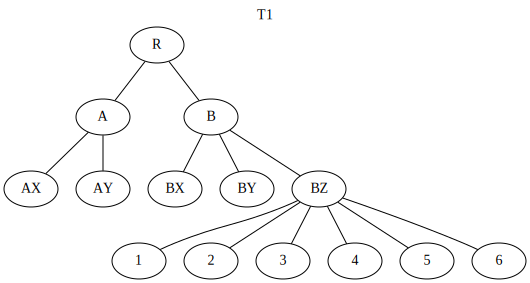

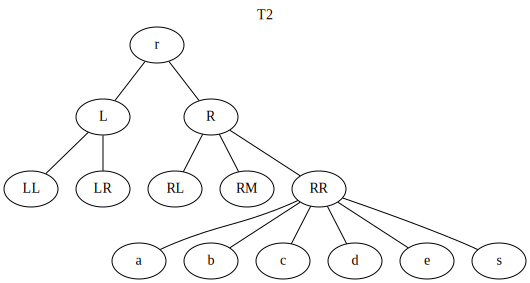





True










Ordered Rooted Tree Examples

Are trees T1 and T3 isomorphic?



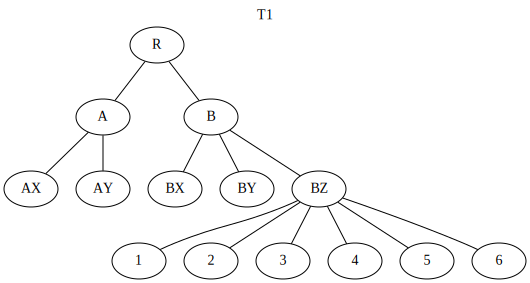

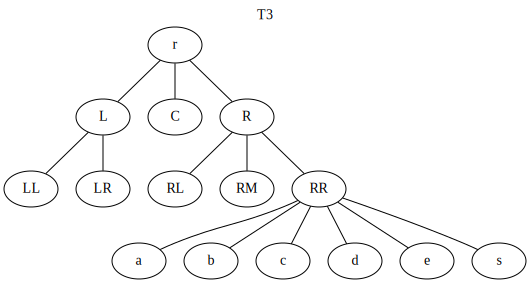





False










Ordered Rooted Tree Examples

Are trees T1 and T4 isomorphic?



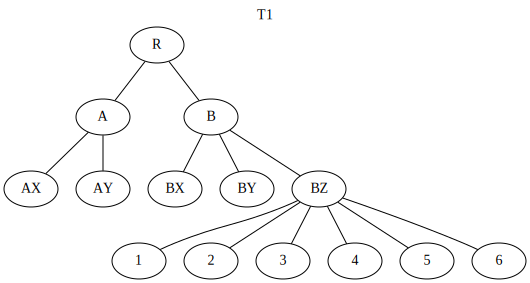

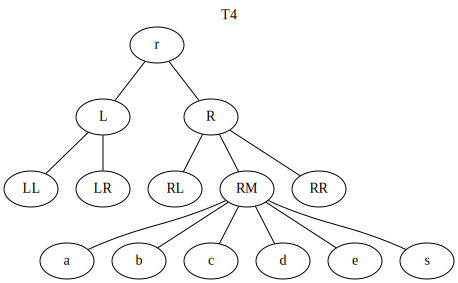





Are trees T1 and T4 isomorphic?
 False










Rooted Tree Examples

Are trees T1 and T2 isomorphic?



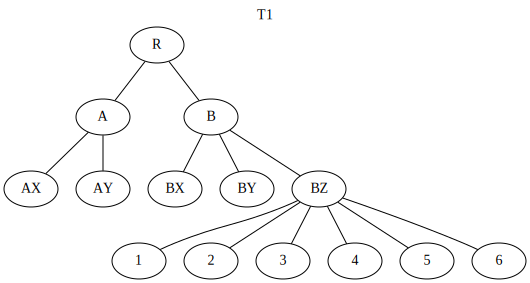

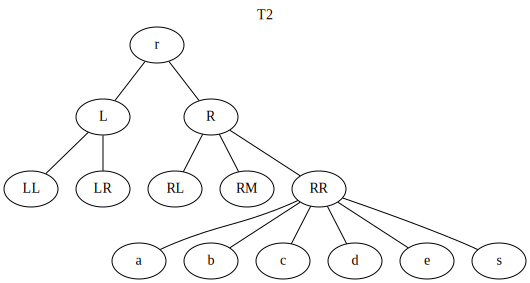





True


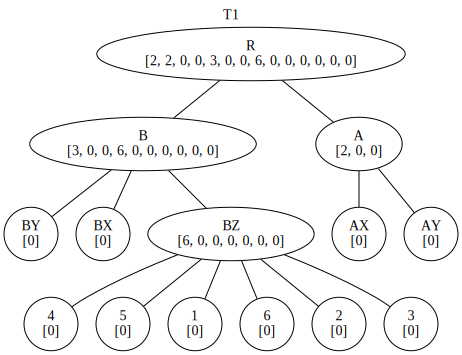

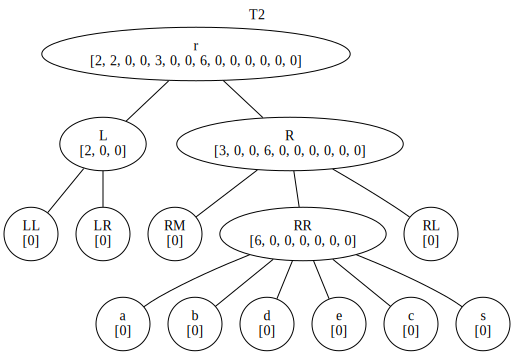











Rooted Tree Examples

Are trees T1 and T3 isomorphic?



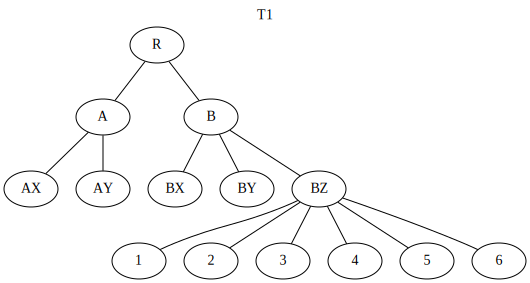

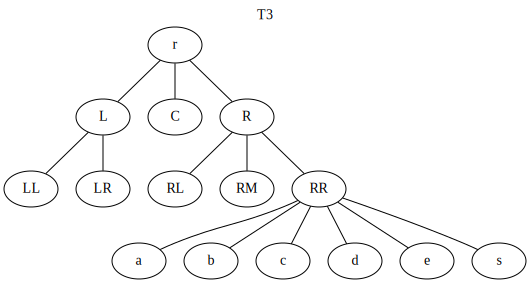





False


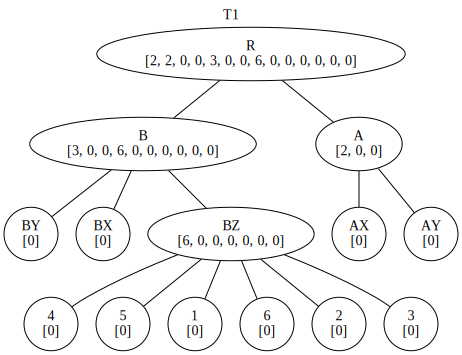

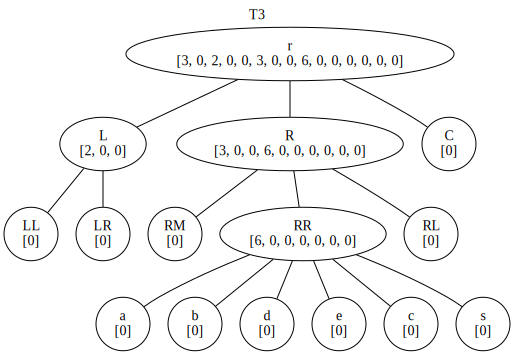











Rooted Tree Examples

Are trees T1 and T4 isomorphic?



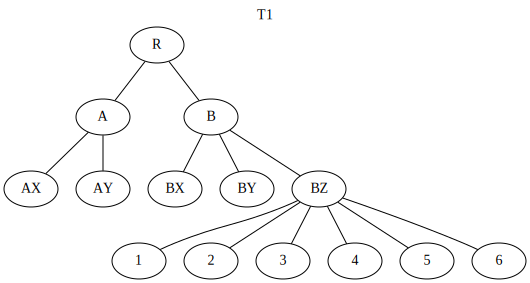

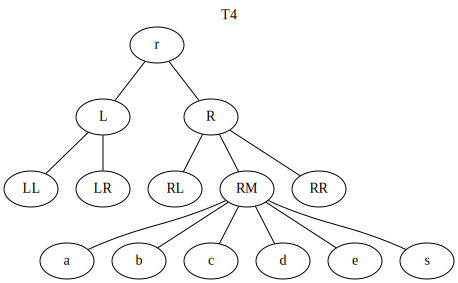





True


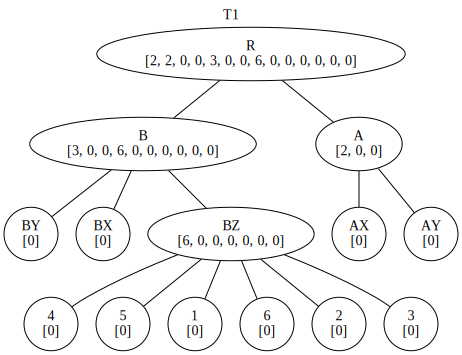

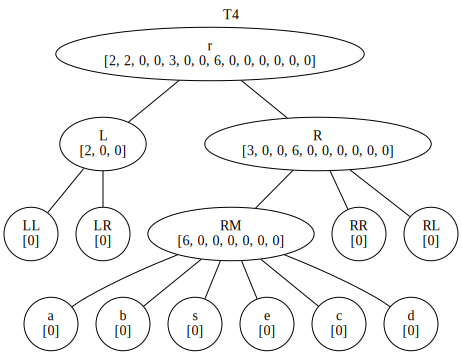











Ordinary Tree Examples

Are trees G1 and G2 isomorphic?




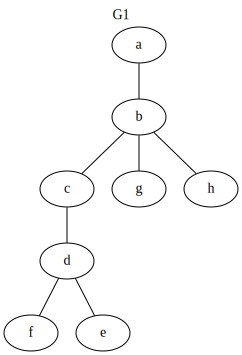

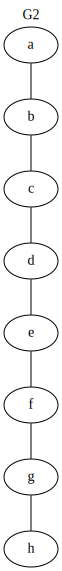





False


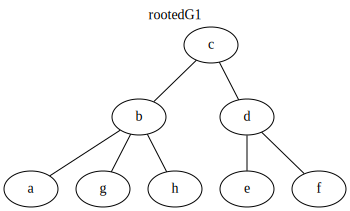

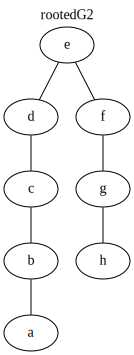











Ordinary Tree Examples

Are trees G1 and G3 isomorphic?



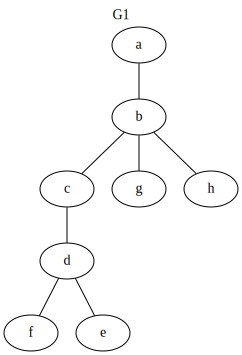

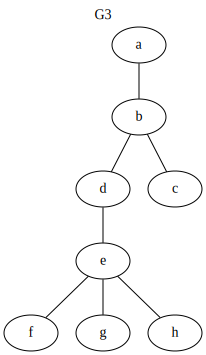





True


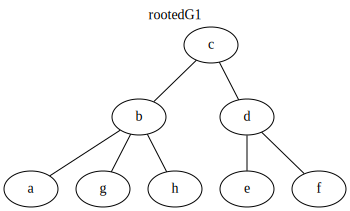

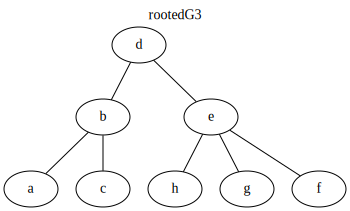











Ordinary Tree Examples

Are trees G1 and G4 isomorphic?



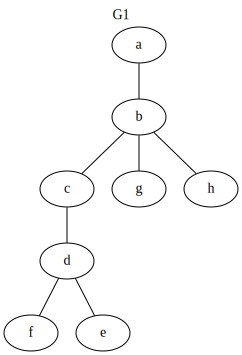

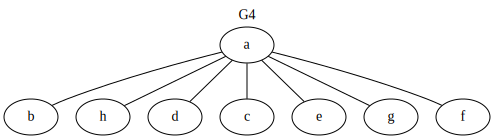





False


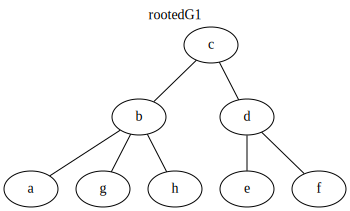

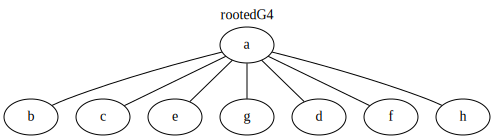

In [4]:
run()

In [ ]:
# %load tree_isomorphism.py
"""
 13. (*) Find an algorithm that test whether two given trees are isomorphic.
 Implement the algorithm using Python.
 What is the complexity of the algorithm?
 Give a short overview about the general graph isomorphism problem.
"""
import unittest
from queue import Queue

from IPython.display import display
from graphviz import Source


class RootedTree:
    """A class for simple rooted trees."""

    def __init__(self, root, structure):
        self.root = root
        self.structure = dict(structure)
        self.father_map = dict()
        self.father_map[self.root] = None
        for node, sons in structure.items():
            for son in sons:
                self.father_map[son] = node
                if self.structure.get(son) is None:
                    self.structure[son] = []

    def get_sons(self, v):
        return self.structure.get(v, [])

    def get_father(self, v):
        return self.father_map.get(v, None)

    def is_leaf(self, v):
        return len(self.get_sons(v)) == 0

    def is_last_son(self, v):
        """Method for ordered rooted trees, returns true if selected vertex is last son of his father"""
        if v == self.root:
            return True
        sons = self.get_sons(self.get_father(v))
        index = sons.index(v)
        if index == len(sons) - 1:
            return True
        return False

    def first(self, v):
        """Returns value of 'first' operator for vertex """
        if not self.is_leaf(v):
            return self.get_sons(v)[0]
        raise IndexError("first of leaf cannot be read")

    def next(self, v):
        """Returns value of 'next' operator for vertex """
        if self.is_last_son(v):
            raise IndexError("next of last son cannot be read")
        sons = self.get_sons(self.get_father(v))
        return sons[sons.index(v) + 1]

    def get_root(self):
        return self.root

    def get_nodes(self):
        return self.structure.keys()

    def get_order(self):
        return len(self.structure)

    def get_size(self):
        return self.get_order() - 1

    def get_dot_string(self, graph_name="Tree", labeled=False):
        """Converts graph into DOT's language string with selected name and optionally - with labels"""
        def get_labels(t):
            labels = ""
            for node in t.get_nodes():
                labels += "\t" + node + "\t[label=\"" + node + "\\n" + str(t.label(node)) + "\"];\n"
            return labels

        def get_edges(node, t):
            edges = ""
            for son in t.get_sons(node):
                edges += "\t" + node + " -- " + son + ";\n"
            for son in t.get_sons(node):
                edges += get_edges(son, t)
            return edges

        return "graph " + graph_name + " { \n forcelabels=true; \n" + \
               (get_labels(self) if labeled else '') + \
               get_edges(self.get_root(), self) + \
               "\tlabelloc=\"t\"; \n\tlabel=\"" + graph_name + "\"; \n } "

    def render(self, title="Tree", labeled=False):
        """Draws graph into iPython environment"""
        dot = self.get_dot_string(labeled=labeled, graph_name=title)
        src = Source(dot)
        display(src)

    def dfs(self, fun):
        """Call argument function for all nodes in DFS order"""
        visited = {node: False for node in self.get_nodes()}

        def _dfs(node, node_function):
            visited[node] = True
            node_function(node)
            for son in self.get_sons(node):
                if not visited[son]:
                    _dfs(son, node_function)

        _dfs(self.get_root(), fun)

    def bfs(self, fun):
        """Call argument function for all nodes in BFS order"""
        visited = {node: False for node in self.get_nodes()}
        root = self.get_root()
        q = Queue()
        fun(root)
        q.put(root)
        while not q.empty():
            node = q.get()
            for v in self.get_sons(node):
                if not visited[v]:
                    visited[v] = True
                    fun(v)
                    q.put(v)

    def label(self, node=None):
        """Returns unique code for selected node or for root, when no args"""
        if node is None:
            node = self.get_root()
        sons = list(self.get_sons(node))
        number = len(sons)
        labels = []
        while sons:
            # backup and remove first vertex from sons
            vertex = sons.pop(0)
            labels.append(self.label(vertex))

        label = [[number]] + sorted(labels)

        return [item for sub_list in label for item in sub_list]

    def print_labels(self):
        def fun(node):
            print(node, "\thas label ", self.label(node))

        self.bfs(fun)


def ordered_rooted_tree_iso(t1, t2):
    """Checks if two ordered rooted trees are isomorphic"""
    if t1.get_size() != t2.get_size():
        return False

    def get_node_number_mapping(t):
        mapping = {node: None for node in t.get_nodes()}

        def int_gen():
            i = 0
            while True:
                yield i
                i += 1

        gen = int_gen()

        def labeler(node):
            mapping[node] = next(gen)

        t.dfs(labeler)

        return mapping

    node_1_to_number = get_node_number_mapping(t1)
    # inverse note to number2 mapping
    number_to_node_2 = {v: k for k, v in get_node_number_mapping(t2).items()}
    sigma = {node1: number_to_node_2[number] for node1, number in node_1_to_number.items()}

    for node in t1.get_nodes():
        if not t1.is_leaf(node):
            if t2.is_leaf(sigma[node]) or (sigma[t1.first(node)] != t2.first(sigma[node])):
                return False
        if not t1.is_last_son(node):
            if t2.is_last_son(sigma[node]) or (sigma[t1.next(node)] != t2.next(sigma[node])):
                return False
    return True


def rooted_tree_iso(t1, t2):
    """Checks if two rooted trees are isomorphic"""
    if t1.get_size() != t2.get_size():
        return False
    return t1.label() == t2.label()


class RootedTreeTest(unittest.TestCase):
    """Simple tests for tree"""
    def setUp(self):
        self.testTree = RootedTree('ROOT', {
            'ROOT': ['L', 'L'],
            'L': ['LL', 'LR'],
            'R': ['RL', 'RM', 'RR'],
        })

    def tearDown(self):
        del self.testTree

    def test_get_root(self):
        self.assertEqual(self.testTree.get_root(), 'ROOT')

    def test_get_order(self):
        self.assertEqual(self.testTree.get_order(), 8)

    def test_get_size(self):
        self.assertEqual(self.testTree.get_size(), 7)


class RootedTreesIsomorphismAlgorithmTest(unittest.TestCase):
    """Tests for rooted trees isomorpism algorithms"""
    def testOrderedRootedTreeIsomorphism(self):
        test = RootedTree('R', {
            'R': ['A', 'B'],
            'A': ['AX', 'AY'],
            'B': ['BX', 'BY', 'BZ'],
            'BZ': ['1', '2', '3', '4', '5', '6']
        })

        iso = RootedTree('r', {
            'r': ['L', 'R'],
            'L': ['LL', 'LR'],
            'R': ['RL', 'RM', 'RR'],
            'RR': ['a', 'b', 'c', 'd', 'e', 's']
        })

        noniso_size = RootedTree('r', {
            'r': ['L', 'C', 'R'],
            'L': ['LL', 'LR'],
            'R': ['RL', 'RM', 'RR'],
            'RR': ['a', 'b', 'c', 'd', 'e', 's']
        })

        noniso_order = RootedTree('r', {
            'r': ['L', 'R'],
            'L': ['LL', 'LR'],
            'R': ['RL', 'RM', 'RR'],
            'RM': ['a', 'b', 'c', 'd', 'e', 's']
        })

        self.assertTrue(ordered_rooted_tree_iso(test, iso))
        self.assertFalse(ordered_rooted_tree_iso(test, noniso_size))
        self.assertFalse(ordered_rooted_tree_iso(test, noniso_order))

    def testRootedTreeIsomorphism(self):
        test = RootedTree('R', {
            'R': ['A', 'B'],
            'A': ['AX', 'AY'],
            'B': ['BX', 'BY', 'BZ'],
            'BZ': ['1', '2', '3', '4', '5', '6']
        })

        iso = RootedTree('r', {
            'r': ['L', 'R'],
            'L': ['LL', 'LR'],
            'R': ['RL', 'RM', 'RR'],
            'RL': ['a', 'b', 'c', 'd', 'e', 's']
        })

        noniso = RootedTree('r', {
            'r': ['L', 'C', 'R'],
            'L': ['LL', 'LR'],
            'R': ['RL', 'RM', 'RR'],
            'RR': ['a', 'b', 'c', 'd', 'e', 's']
        })

        self.assertEqual(test.label(), iso.label())
        self.assertFalse(rooted_tree_iso(test, noniso))


class Tree:
    """A class for simple undirected tree."""

    def __init__(self, V=set(), E=set()):
        self.G = dict((v, set()) for v in V)
        for e in E:
            u = e[0]
            w = e[1]
            self.G[u].add(w)
            self.G[w].add(u)

    def vertices(self):
        return set(self.G.keys())

    def edges(self):
        return set([(u, v) for u in self.G.keys() for v in self.G[u] if u < v])

    def order(self):
        return len(self.vertices())

    def size(self):
        return len(self.edges())

    def neighbors(self, v):
        return self.G[v]

    def deg(self, v):
        return len(self.G[v])

    def paths(self, init_vertex):
        """Returns paths between init vertex and all others"""
        path = {node: None for node in self.vertices()}
        q = Queue()
        q.put(init_vertex)
        path[init_vertex] = [init_vertex]

        while not q.empty():
            node = q.get()
            for v in self.neighbors(node):
                if path[v] is None:
                    path[v] = path[node] + [v]
                    q.put(v)
        return path

    def center(self):
        """Returns center of graph, as one or two values"""
        import random
        some_node = random.choice(list(self.vertices()))
        #print("some node", some_node)
        paths = self.paths(some_node)
        #print("paths", paths)
        farthest_node = max(paths, key=lambda k: len(paths[k]))
        #print("farthest_node ", farthest_node)
        longest_path = max(self.paths(farthest_node).values(), key=len)
        #print("longest_path ", longest_path )

        size = len(longest_path)
        if size % 2 == 0:
            return [longest_path[size // 2], longest_path[size // 2 - 1]]
        else:
            return [longest_path[(size - 1) // 2]]

    def rooted_tree(self, root):
        """Produces rooted tree rooted in root vertex"""
        structure = dict()

        visited = {node: False for node in self.vertices()}
        q = Queue()
        q.put(root)
        visited[root] = True
        while not q.empty():
            node = q.get()
            structure[node] = [v for v in self.neighbors(node) if visited[v] == False]
            for v in self.neighbors(node):
                if not visited[v]:
                    visited[v] = True
                    q.put(v)

        return RootedTree(root, structure)

    def render(self, title="Tree"):
        dot = "graph " + title.replace(" ", "") + " { \n forcelabels=true; \n"

        for u,v in self.edges():
            dot += "\t" + u + " -- " + v + ";\n"

        dot += "\tlabelloc=\"t\"; \n\tlabel=\"" + title + "\"; \n } "


        src = Source(dot)
        display(src)



def unrooted_tree_iso(t1, t2):
    """Checks if two trees are isomorphic"""
    if t1.size() != t2.size():
        return False
    c1 = t1.center()
    c2 = t2.center()
    if len(c1) == len(c2):
        if len(c1) == 1:
            return rooted_tree_iso(t1.rooted_tree(c1[0]), t2.rooted_tree(c2[0]))
        if len(c2) == 2:
            return rooted_tree_iso(t1.rooted_tree(c1[0]), t2.rooted_tree(c2[0])) or rooted_tree_iso(
                t1.rooted_tree(c1[1]), t2.rooted_tree(c2[0]))
    else:
        return False



def show_ort(case):

    print("Ordered Rooted Tree Examples\n")


    t1 = RootedTree('R', {
        'R': ['A', 'B'],
        'A': ['AX', 'AY'],
        'B': ['BX', 'BY', 'BZ'],
        'BZ': ['1', '2', '3', '4', '5', '6']
    })

    t2 = RootedTree('r', {
        'r': ['L', 'R'],
        'L': ['LL', 'LR'],
        'R': ['RL', 'RM', 'RR'],
        'RR': ['a', 'b', 'c', 'd', 'e', 's']
    })

    t3 = RootedTree('r', {
        'r': ['L', 'C', 'R'],
        'L': ['LL', 'LR'],
        'R': ['RL', 'RM', 'RR'],
        'RR': ['a', 'b', 'c', 'd', 'e', 's']
    })

    t4 = RootedTree('r', {
        'r': ['L', 'R'],
        'L': ['LL', 'LR'],
        'R': ['RL', 'RM', 'RR'],
        'RM': ['a', 'b', 'c', 'd', 'e', 's']
    })


    #t1.render("T1")
    #t2.render("T2")
    #t3.render("T3")
    #t4.render("T4")


    if case == 1:
        print("Are trees T1 and T2 isomorphic?\n")
        t1.render("T1")
        t2.render("T2")
        print("\n\n\n")
        print(ordered_rooted_tree_iso(t1, t2))

    if case == 2:
        print("Are trees T1 and T3 isomorphic?\n")
        t1.render("T1")
        t3.render("T3")
        print("\n\n\n")
        print(ordered_rooted_tree_iso(t1, t3))

    if case == 3:
        print("Are trees T1 and T4 isomorphic?\n")
        t1.render("T1")
        t4.render("T4")
        print("\n\n\n")
        print("Are trees T1 and T4 isomorphic?\n",  ordered_rooted_tree_iso(t1, t4))



def show_rt(case):
    print("Rooted Tree Examples\n")


    t1 = RootedTree('R', {
        'R': ['A', 'B'],
        'A': ['AX', 'AY'],
        'B': ['BX', 'BY', 'BZ'],
        'BZ': ['1', '2', '3', '4', '5', '6']
    })

    t2 = RootedTree('r', {
        'r': ['L', 'R'],
        'L': ['LL', 'LR'],
        'R': ['RL', 'RM', 'RR'],
        'RR': ['a', 'b', 'c', 'd', 'e', 's']
    })

    t3 = RootedTree('r', {
        'r': ['L', 'C', 'R'],
        'L': ['LL', 'LR'],
        'R': ['RL', 'RM', 'RR'],
        'RR': ['a', 'b', 'c', 'd', 'e', 's']
    })

    t4 = RootedTree('r', {
        'r': ['L', 'R'],
        'L': ['LL', 'LR'],
        'R': ['RL', 'RM', 'RR'],
        'RM': ['a', 'b', 'c', 'd', 'e', 's']
    })


    if case == 1:
        print("Are trees T1 and T2 isomorphic?\n")
        t1.render("T1")
        t2.render("T2")
        print("\n\n\n")
        print(rooted_tree_iso(t1, t2))
        t1.render("T1", True)
        t2.render("T2", True)
    if case == 2:
        print("Are trees T1 and T3 isomorphic?\n")
        t1.render("T1")
        t3.render("T3")
        print("\n\n\n")
        print(rooted_tree_iso(t1, t3))
        t1.render("T1", True)
        t3.render("T3", True)


    if case == 3:
        print("Are trees T1 and T4 isomorphic?\n")
        t1.render("T1")
        t4.render("T4")
        print("\n\n\n")
        print(rooted_tree_iso(t1, t4))
        t1.render("T1", True)
        t4.render("T4", True)

def show_t(case):
    print("Ordinary Tree Examples\n")

    V = {'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'}
    E1 = {('a', 'b'), ('b', 'c'), ('c', 'd'), ('d', 'e'), ('d', 'f'), ('b', 'h'), ('b', 'g',)}
    E2 = {('a', 'b'), ('b', 'c'), ('c', 'd'), ('d', 'e'), ('e', 'f'), ('f', 'g'), ('g', 'h',)}
    E3 = {('a', 'b'), ('c', 'b'), ('b', 'd'), ('d', 'e'), ('e', 'f'), ('e', 'h'), ('e', 'g',)}
    E4 = {('a', 'b'), ('a', 'c'), ('a', 'd'), ('a', 'e'), ('a', 'f'), ('a', 'g'), ('a', 'h',)}

    g1 = Tree(V, E1)
    g2 = Tree(V, E2)
    g3 = Tree(V, E3)
    g4 = Tree(V, E4)

    #g1.render("G1")
    #g2.render("G2")
    #g3.render("G3")
    #g4.render("G4")

    if case == 1:
        print("Are trees G1 and G2 isomorphic?\n\n")
        g1.render("G1")
        g2.render("G2")
        print("\n\n\n")
        print(unrooted_tree_iso(g1, g2))
        g1.rooted_tree(g1.center()[0]).render("rootedG1")
        g2.rooted_tree(g2.center()[0]).render("rootedG2")
    if case == 2:
        print("Are trees G1 and G3 isomorphic?\n")
        g1.render("G1")
        g3.render("G3")
        print("\n\n\n")
        print(unrooted_tree_iso(g1, g3))
        g1.rooted_tree(g1.center()[0]).render("rootedG1")
        g3.rooted_tree(g3.center()[0]).render("rootedG3")
    if case == 3:
        print("Are trees G1 and G4 isomorphic?\n")
        g1.render("G1")
        g4.render("G4")
        print("\n\n\n")
        print(unrooted_tree_iso(g1, g4))
        g1.rooted_tree(g1.center()[0]).render("rootedG1")
        g4.rooted_tree(g4.center()[0]).render("rootedG4")

def show_label():
    t1 = RootedTree('R', {
        'R': ['A', 'B'],
        'A': ['AX', 'AY'],
        'B': ['BX', 'BY', 'BZ'],
        'BZ': ['1', '2', '3', '4', '5', '6']
    })

    t1.render("T", labeled=False)
    t1.render("LabeledT", labeled=True)

def run():
    show_ort(1)
    print("\n\n\n\n\n\n\n\n\n")
    show_ort(2)
    print("\n\n\n\n\n\n\n\n\n")
    show_ort(3)
    print("\n\n\n\n\n\n\n\n\n")
    show_rt(1)
    print("\n\n\n\n\n\n\n\n\n")
    show_rt(2)
    print("\n\n\n\n\n\n\n\n\n")
    show_rt(3)
    print("\n\n\n\n\n\n\n\n\n")
    show_t(1)
    print("\n\n\n\n\n\n\n\n\n")
    show_t(2)
    print("\n\n\n\n\n\n\n\n\n")
    show_t(3)
    print("\n\n\n\n\n\n\n\n\n")

if __name__ == "__main__":
    print("Welcome in interactive demonstration of Tree Isomorphism Problem \n ")
    # run()
    # %%javascript
    # IPython.OutputArea.auto_scroll_threshold = 9999;
